In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd /gdrive/MyDrive/Stock_price

/gdrive/MyDrive/Stock_price


In [ ]:
ls

'Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv'
'Uniqlo(FastRetailing) 2017 Test - stocks2017.csv'


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Uploading Dataset

In [ ]:
df_train=pd.read_csv('Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')
df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [ ]:
df_test=pd.read_csv('Uniqlo(FastRetailing) 2017 Test - stocks2017.csv')
df_test.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2017-01-13,38900,39380,38240,38430,1321200,51197289000
1,2017-01-12,38300,38450,37930,38010,800900,30540359000
2,2017-01-11,38710,38880,38480,38560,545900,21089798000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-06,40500,41030,39720,39720,1435500,57708934000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Open           7 non-null      int64 
 2   High           7 non-null      int64 
 3   Low            7 non-null      int64 
 4   Close          7 non-null      int64 
 5   Volume         7 non-null      int64 
 6   Stock Trading  7 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 520.0+ bytes


In [ ]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000
mean,33754.416803,34178.784666,33347.903752,33760.583197,727555.628059,24409326331.973900
std,10813.440409,10936.326802,10695.664102,10815.661389,413717.772821,15262997763.732494
min,13720.000000,13840.000000,13600.000000,13720.000000,139100.000000,3966140000.000000
25%,27788.750000,28091.250000,27401.250000,27675.000000,487300.000000,14540968250.000000
50%,34445.000000,34835.000000,33925.000000,34412.500000,626000.000000,21537716500.000000
75%,41412.500000,41900.000000,40810.000000,41365.000000,826700.000000,30159223750.000000
max,61550.000000,61970.000000,60740.000000,61930.000000,4937300.000000,146045036000.000000


# EDA

In [ ]:
df_train.isna().sum().sum()

0

In [ ]:
df_test.isna().sum().sum()

0

In [ ]:
df_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Stock Trading'], dtype='object')

In [ ]:
train_dates = pd.to_datetime(df_train['Date'])
print(train_dates)

0      2016-12-30
1      2016-12-29
2      2016-12-28
3      2016-12-27
4      2016-12-26
          ...    
1221   2012-01-11
1222   2012-01-10
1223   2012-01-06
1224   2012-01-05
1225   2012-01-04
Name: Date, Length: 1226, dtype: datetime64[ns]


In [ ]:
cols = list(df_train)[1:5]
cols

['Open', 'High', 'Low', 'Close']

In [ ]:
df_training = df_train[cols].astype(int)

In [ ]:
df_testing = df_test[cols].astype(int)

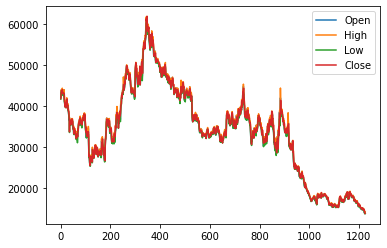

In [ ]:
plot_train=df_training
plot_train.plot.line()

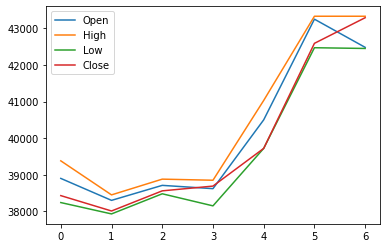

In [ ]:
plot_train=df_testing
plot_train.plot.line()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_training)
df_training_scaled = scaler.transform(df_training)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_testing)
df_testing_scaled = scaler.transform(df_testing)

In [ ]:
trainX = []
trainY = []
testX=[]
testY=[]

n_future = 1  
n_past = 14 

n_past_test=4

In [ ]:
for i in range(n_past, len(df_training_scaled) - n_future +1):
    trainX.append(df_training_scaled[i - n_past:i, 0:df_training.shape[1]])
    trainY.append(df_training_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1212, 14, 4).
trainY shape == (1212, 1).


In [ ]:
for i in range(n_past_test, len(df_testing_scaled) - n_future +1):
    testX.append(df_testing_scaled[i - n_past_test:i, 0:df_testing.shape[1]])
    testY.append(df_testing_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
testX, testY = np.array(testX), np.array(testY)

In [ ]:
print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (3, 4, 4).
testY shape == (3, 1).


# Model creation

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY,
                    epochs=15, 
                    batch_size=16, 
                    validation_split=0.1, verbose=1)

Epoch 1/15
69/69 [==============================] - 4s 19ms/step - loss: 0.2037 - val_loss: 0.0045
Epoch 2/15
69/69 [==============================] - 1s 14ms/step - loss: 0.0488 - val_loss: 0.0042
Epoch 3/15
69/69 [==============================] - 1s 14ms/step - loss: 0.0482 - val_loss: 0.0033
Epoch 4/15
69/69 [==============================] - 1s 14ms/step - loss: 0.0413 - val_loss: 0.0054
Epoch 5/15
69/69 [==============================] - 1s 14ms/step - loss: 0.0361 - val_loss: 0.0028
Epoch 6/15
69/69 [==============================] - 1s 14ms/step - loss: 0.0364 - val_loss: 0.0034
Epoch 7/15
69/69 [==============================] - 1s 14ms/step - loss: 0.0392 - val_loss: 0.0465
Epoch 8/15
69/69 [==============================] - 1s 14ms/step - loss: 0.0394 - val_loss: 0.0085
Epoch 9/15
69/69 [==============================] - 1s 14ms/step - loss: 0.0326 - val_loss: 0.0026
Epoch 10/15
69/69 [==============================] - 1s 14ms/step - loss: 0.0351 - val_loss: 0.0060
Epoch 11/

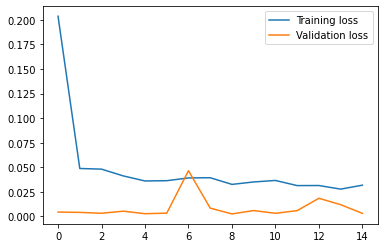

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
model1 = Sequential()
model1.add(LSTM(64, activation='relu', input_shape=(testX.shape[1], testX.shape[2]), return_sequences=True))
model1.add(LSTM(32, activation='relu', return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(testY.shape[1]))

In [ ]:
model1.compile(optimizer='adam', loss='mse')

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 64)             17664     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model1.fit(testX, testY,
                    epochs=15, 
                    batch_size=16, 
                    validation_split=0.1, verbose=1)

Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: 1.3152 - val_loss: 1.4844
Epoch 2/15
1/1 [==============================] - 0s 38ms/step - loss: 1.3262 - val_loss: 1.4645
Epoch 3/15
1/1 [==============================] - 0s 37ms/step - loss: 1.3048 - val_loss: 1.4439
Epoch 4/15
1/1 [==============================] - 0s 39ms/step - loss: 1.2229 - val_loss: 1.4219
Epoch 5/15
1/1 [==============================] - 0s 39ms/step - loss: 1.2597 - val_loss: 1.3996
Epoch 6/15
1/1 [==============================] - 0s 38ms/step - loss: 1.2327 - val_loss: 1.3767
Epoch 7/15
1/1 [==============================] - 0s 36ms/step - loss: 1.2172 - val_loss: 1.3529
Epoch 8/15
1/1 [==============================] - 0s 41ms/step - loss: 1.2201 - val_loss: 1.3280
Epoch 9/15
1/1 [==============================] - 0s 35ms/step - loss: 1.1145 - val_loss: 1.3020
Epoch 10/15
1/1 [==============================] - 0s 38ms/step - loss: 1.1406 - val_loss: 1.2740
Epoch 11/15
1/1 [==============

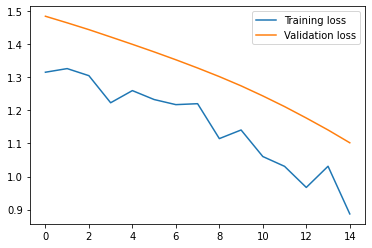

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Prediction

In [ ]:
train_predictions = model.predict(trainX).flatten()
trainY=trainY.flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

,Train Predictions,Actuals
0,0.843131,0.735088
1,0.806426,0.714734
2,0.733458,0.624069
3,0.665727,0.610192
4,0.603241,0.583363
...,...,...
1207,-1.711054,-1.794279
1208,-1.714690,-1.837761
1209,-1.724746,-1.828510
1210,-1.737248,-1.853489


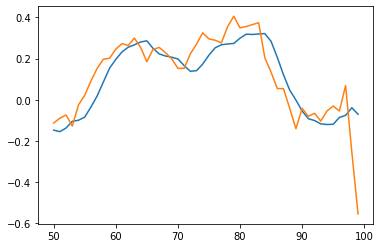

In [ ]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
test_predictions = model.predict(testX).flatten()
testY=testY.flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

,Test Predictions,Actuals
0,-0.443659,0.209019
1,-0.300799,1.677491
2,0.065110,1.266319


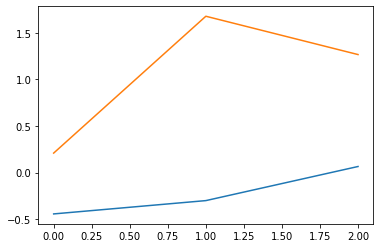

In [ ]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])